# Data exploration
Let us first load the data from CSV and take a look at the real data. We will then explore the teams that are most competitive to get hired into.

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('pokemon_trainer_application_data.csv')
raw_data_backup = raw_data

/Users/saurav/Distributions/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [4]:
raw_data[:5]

,ApplicationStatus,ApplicationType,ApplyDate,CurrentlyEmployed,CurrentlyTrainingPokemon,CurrentlyWorkInThisRegion,GraduateSchoolGPA,GraduateSchoolGraduate,GymBadge1Pokemon,GymBadge2Pokemon,GymBadge3Pokemon,GymBadge4Pokemon,GymBadgePerm1,GymBadgePerm2,GymBadgePerm3,GymBadgePerm4,GymBadgeTemp1,GymBadgeTemp2,GymBadgeTemp3,GymBadgeTemp4,GymCertificationEverSuspended,GymCertified,HighEduLevelCompleted,HighSchoolGPA,HighSchoolGraduate,HiredSalaryOffer,InternalEmployee,JobPostingDate,JobSchedule,JobShiftDay,JobShiftEvening,JobShiftNight,JobShiftRotating,JobShiftWeekend,JobStatusFlexTime,JobStatusFullTime,JobStatusPartTime,JobStatusPerDiem,JobStatusTemp,LastPerformaceRating,OtherSchoolGPA,OtherSchoolGraduate,PokemonTrainerClass,PokemonWorldRegion,PositionForTrainingPokemon,RecentTrainingExperience1ContactForRef,RecentTrainingExperience1EmploymentStatus,RecentTrainingExperience1From,RecentTrainingExperience1PayRateEnd,RecentTrainingExperience1Pokemon,RecentTrainingExperience1To,RecentTrainingExperience2ContactForRef,RecentTrainingExperience2EmploymentStatus,RecentTrainingExperience2From,RecentTrainingExperience2PayRateEnd,RecentTrainingExperience2Pokemon,RecentTrainingExperience2To,RecentTrainingExperience3ContactForRef,RecentTrainingExperience3EmploymentStatus,RecentTrainingExperience3From,RecentTrainingExperience3PayRateEnd,RecentTrainingExperience3Pokemon,RecentTrainingExperience3To,RecentTrainingExperience4ContactForRef,RecentTrainingExperience4EmploymentStatus,RecentTrainingExperience4From,RecentTrainingExperience4PayRateEnd,RecentTrainingExperience4Pokemon,RecentTrainingExperience4To,RecentTrainingExperienceContactForRefNA,RecentTrainingExperienceContactForRefNo,RecentTrainingExperienceContactForRefPostHire,RecentTrainingExperienceContactForRefYes,ReferenceRelationship1,ReferenceRelationship2,ReferenceRelationship3,SpokenWithCurrentBoss,TechnicalSchoolGPA,TechnicalSchoolGraduate,TotalYearsOfExp,UndergradSchoolGPA,UndergradSchoolGraduate,WorkedInThisRegion,WorkingForJobAppliedFor,hired
0,Filed Not Hired,Applicant,2013-11-26,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,NaN,NaN,HS,3.50,Yes,NaN,False,2013-11-19,PRN,True,False,False,False,False,False,True,False,False,False,NaN,NaN,NaN,Skier,Johto,Glaceon,False,full time,2003-09-01,42000.00 PER_YEAR,NaN,2012-09-01,False,full time,1990-09-01,40000.00 PER_YEAR,NaN,2002-07-01,False,NaN,1987-02-01,20000.00 PER_YEAR,NaN,1990-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friend,Friend,NaN,NaN,NaN,NaN,3.0,NaN,NaN,False,NaN,0.0
1,Filed Not Hired,Applicant,2013-11-27,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,HS/GED,3.68,Yes,NaN,False,2013-11-19,PRN,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,Skier,Johto,Glaceon,True,part time,2013-08-01,11.86 PER_HOUR,Blitzle,2013-12-01,True,part time,2010-08-01,7.25 PER_HOUR,Blitzle,2010-12-01,True,full time,2012-06-01,9.00 PER_HOUR,Blitzle,2013-02-01,True,full time,2011-08-01,NaN,Blitzle,2012-01-01,NaN,NaN,NaN,NaN,Professor,Fellow Trainer,Fellow Trainer,NaN,NaN,NaN,5.0,NaN,No,False,NaN,0.0
2,Filed Not Hired,Applicant,2013-11-22,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,NaN,NaN,Bachelors,3.80,Yes,NaN,False,2013-10-29,Full-time,True,True,True,True,True,False,True,True,False,False,NaN,NaN,NaN,Skier,Johto,Glaceon,True,full time,2012-04-01,42000.00 PER_YEAR,NaN,NaN,True,part time,2012-01-01,30000.00 PER_YEAR,NaN,2012-04-01,False,part time,2011-07-01,28000.00 PER_YEAR,Blitzle,2012-01-01,False,part time,2009-05-01,35000.00 PER_YEAR,NaN,2011-04-01,NaN,NaN,NaN,NaN,Professor,Professor,Fellow Trainer,NaN,NaN,NaN,5.0,3.0,Yes,False,NaN,0.0
3,Filed Not Hired,Applicant,2013-11-23,True,NaN,False,NaN,NaN,Seedot,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,AD,2.30,Yes,NaN,False,2013-11-19,PRN,True,True,True,True,True,True,True,True,False,True,NaN,NaN,NaN,Skier,Johto,Glaceon,True,part time,20

In [5]:
len(raw_data)

100000

Let's check for missing values.

In [6]:
raw_data.count()

ApplicationStatus                                 99996
ApplicationType                                  100000
ApplyDate                                        100000
CurrentlyEmployed                                 82596
CurrentlyTrainingPokemon                           3911
CurrentlyWorkInThisRegion                         92482
GraduateSchoolGPA                                  3889
GraduateSchoolGraduate                             9789
GymBadge1Pokemon                                  34973
GymBadge2Pokemon                                  16411
GymBadge3Pokemon                                   5901
GymBadge4Pokemon                                   1812
GymBadgePerm1                                     93473
GymBadgePerm2                                     93473
GymBadgePerm3                                     93473
GymBadgePerm4                                     93473
GymBadgeTemp1                                     93473
GymBadgeTemp2                                   

We see that `hired`, our target column, has the value missing for 3,679 rows (out of 100,000). Without any background for assumptions, it may be safe to drop these rows so that we don't end up contaminating the stats and the subsequent model. 

**NOTE:** We will deal with the missing values in the feature set later. 

In [7]:
raw_data.dropna(subset=['hired'], inplace=True)

Now we look at the application volume and hiring numbers of each "team", i.e. each PokemonTrainerClass for each PokemonWorldRegion.

In [8]:
raw_data.groupby(['PokemonWorldRegion','PokemonTrainerClass']).agg(['count','sum'])['hired']

count    sum
PokemonWorldRegion PokemonTrainerClass              
Alola              Dragon Tamer           738    9.0
                   Nurse                    1    0.0
                   Scientist               39    1.0
                   Skier                  155    0.0
Hoenn              Doctor                  12    1.0
                   Dragon Tamer           184    2.0
                   Engineer              4118   54.0
                   Nurse                 2601   77.0
                   Pokemon Ranger        3669  123.0
                   Scientist              129    3.0
                   Skier                 1545   12.0
Johto              Doctor                  51    7.0
                   Dragon Tamer           201    6.0
                   Engineer              6991   61.0
                   Nurse                 5915  135.0
                   Pokemon Ranger        7499  150.0
                   Scientist              268    9.0
                   Skier                 7804   47.0
Kalos              Dragon Tamer             7    0.0
                   Engineer               129    0.0
                   Nurse                    3    2.0
                   Pokemon Ranger          19    6.0
                   Scientist               14    0.0
                   Skier                   62    1.0
Kanto              Curmudgeon             788   16.0
                   Doctor                 209   14.0
                   Dragon Tamer          1900   33.0
                   Engineer             14580  161.0
                   Nurse                 5752  208.0
                   Pokemon Ranger       10272  262.0
                   Scientist             1276   34.0
                   Skier                13862  146.0
Sevii Islands      Dragon Tamer             2    0.0
                   Engineer                41    1.0
                   Nurse                   30    0.0
                   Pokemon Ranger          30    2.0
Sinnoh             Dragon Tamer            31    2.0
                   Engineer              1990   13.0
                   Nurse                  652   15.0
                   Pokemon Ranger        1304   27.0
                   Scientist               24    1.0
                   Skier                  514    3.0
Unova              Dragon Tamer           310    8.0
                   Engineer               240    1.0
                   Nurse                    1    1.0
                   Pokemon Ranger           4    2.0
                   Scientist                3    0.0
                   Skier                  352    2.0

It looks like **Kanto** region in general, and especially **Engineer**, **Skier** and **Pokemon Rangers** in **Kanto** get more applications than any other team in the rest of the Pokemon World. 

Now let's take a look at the *acceptance rate*, as a measure of difficulty. Before we calculate that we look at only teams that have had at least 100 applications and more than 2 hires in order to filter out some noise. Those filter choices are arbitrary.

In [9]:
filtered = raw_data.groupby(['PokemonWorldRegion','PokemonTrainerClass']).filter(lambda x : x['hired'].count() > 100 and x['hired'].sum() > 2)
100 * filtered.groupby(['PokemonWorldRegion','PokemonTrainerClass']).sum()['hired']/filtered.groupby(['PokemonWorldRegion','PokemonTrainerClass']).count()['hired']

PokemonWorldRegion  PokemonTrainerClass
Alola               Dragon Tamer           1.219512
Hoenn               Engineer               1.311316
                    Nurse                  2.960400
                    Pokemon Ranger         3.352412
                    Scientist              2.325581
                    Skier                  0.776699
Johto               Dragon Tamer           2.985075
                    Engineer               0.872550
                    Nurse                  2.282333
                    Pokemon Ranger         2.000267
                    Scientist              3.358209
                    Skier                  0.602255
Kanto               Curmudgeon             2.030457
                    Doctor                 6.698565
                    Dragon Tamer           1.736842
                    Engineer               1.104252
                    Nurse                  3.616134
                    Pokemon Ranger         2.550623
                    Scie

Examining the acceptance rate, we find that **Skier** classes at **Sinnoh** and **Johto** have the most strngent acceptance rates among teams for which we have decided that we have enough data.


# Predictive model 
Next we train a classifier to predict whether a candidate is likely to get hired. And we will also study what are the factors that play an important role in that.

In [10]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix

import pylab as pl

### Feature engineering
A review of the categories suggest the ApplicationStatus and HiredSalaryOffer are columns that track the status of the candidate through the hiring process, and would not be avilable a-priori. Hence these should not be used to build the predictive model.

Indeed, I have verified that if these columns are used by the model and the model is tested on a held out test data (where these columns are also available), then these turn out to be highly "predictive" and the model performance is falsely inflated. Hence these columns are not to be used.

In [11]:
blacklist_columns = ['ApplicationStatus', 'HiredSalaryOffer']
raw_data = raw_data.drop(blacklist_columns, axis=1)

In [12]:
raw_data[:5]

,ApplicationType,ApplyDate,CurrentlyEmployed,CurrentlyTrainingPokemon,CurrentlyWorkInThisRegion,GraduateSchoolGPA,GraduateSchoolGraduate,GymBadge1Pokemon,GymBadge2Pokemon,GymBadge3Pokemon,GymBadge4Pokemon,GymBadgePerm1,GymBadgePerm2,GymBadgePerm3,GymBadgePerm4,GymBadgeTemp1,GymBadgeTemp2,GymBadgeTemp3,GymBadgeTemp4,GymCertificationEverSuspended,GymCertified,HighEduLevelCompleted,HighSchoolGPA,HighSchoolGraduate,InternalEmployee,JobPostingDate,JobSchedule,JobShiftDay,JobShiftEvening,JobShiftNight,JobShiftRotating,JobShiftWeekend,JobStatusFlexTime,JobStatusFullTime,JobStatusPartTime,JobStatusPerDiem,JobStatusTemp,LastPerformaceRating,OtherSchoolGPA,OtherSchoolGraduate,PokemonTrainerClass,PokemonWorldRegion,PositionForTrainingPokemon,RecentTrainingExperience1ContactForRef,RecentTrainingExperience1EmploymentStatus,RecentTrainingExperience1From,RecentTrainingExperience1PayRateEnd,RecentTrainingExperience1Pokemon,RecentTrainingExperience1To,RecentTrainingExperience2ContactForRef,RecentTrainingExperience2EmploymentStatus,RecentTrainingExperience2From,RecentTrainingExperience2PayRateEnd,RecentTrainingExperience2Pokemon,RecentTrainingExperience2To,RecentTrainingExperience3ContactForRef,RecentTrainingExperience3EmploymentStatus,RecentTrainingExperience3From,RecentTrainingExperience3PayRateEnd,RecentTrainingExperience3Pokemon,RecentTrainingExperience3To,RecentTrainingExperience4ContactForRef,RecentTrainingExperience4EmploymentStatus,RecentTrainingExperience4From,RecentTrainingExperience4PayRateEnd,RecentTrainingExperience4Pokemon,RecentTrainingExperience4To,RecentTrainingExperienceContactForRefNA,RecentTrainingExperienceContactForRefNo,RecentTrainingExperienceContactForRefPostHire,RecentTrainingExperienceContactForRefYes,ReferenceRelationship1,ReferenceRelationship2,ReferenceRelationship3,SpokenWithCurrentBoss,TechnicalSchoolGPA,TechnicalSchoolGraduate,TotalYearsOfExp,UndergradSchoolGPA,UndergradSchoolGraduate,WorkedInThisRegion,WorkingForJobAppliedFor,hired
0,Applicant,2013-11-26,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,NaN,NaN,HS,3.50,Yes,False,2013-11-19,PRN,True,False,False,False,False,False,True,False,False,False,NaN,NaN,NaN,Skier,Johto,Glaceon,False,full time,2003-09-01,42000.00 PER_YEAR,NaN,2012-09-01,False,full time,1990-09-01,40000.00 PER_YEAR,NaN,2002-07-01,False,NaN,1987-02-01,20000.00 PER_YEAR,NaN,1990-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friend,Friend,NaN,NaN,NaN,NaN,3.0,NaN,NaN,False,NaN,0.0
1,Applicant,2013-11-27,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,HS/GED,3.68,Yes,False,2013-11-19,PRN,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,Skier,Johto,Glaceon,True,part time,2013-08-01,11.86 PER_HOUR,Blitzle,2013-12-01,True,part time,2010-08-01,7.25 PER_HOUR,Blitzle,2010-12-01,True,full time,2012-06-01,9.00 PER_HOUR,Blitzle,2013-02-01,True,full time,2011-08-01,NaN,Blitzle,2012-01-01,NaN,NaN,NaN,NaN,Professor,Fellow Trainer,Fellow Trainer,NaN,NaN,NaN,5.0,NaN,No,False,NaN,0.0
2,Applicant,2013-11-22,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,NaN,NaN,Bachelors,3.80,Yes,False,2013-10-29,Full-time,True,True,True,True,True,False,True,True,False,False,NaN,NaN,NaN,Skier,Johto,Glaceon,True,full time,2012-04-01,42000.00 PER_YEAR,NaN,NaN,True,part time,2012-01-01,30000.00 PER_YEAR,NaN,2012-04-01,False,part time,2011-07-01,28000.00 PER_YEAR,Blitzle,2012-01-01,False,part time,2009-05-01,35000.00 PER_YEAR,NaN,2011-04-01,NaN,NaN,NaN,NaN,Professor,Professor,Fellow Trainer,NaN,NaN,NaN,5.0,3.0,Yes,False,NaN,0.0
3,Applicant,2013-11-23,True,NaN,False,NaN,NaN,Seedot,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,AD,2.30,Yes,False,2013-11-19,PRN,True,True,True,True,True,True,True,True,False,True,NaN,NaN,NaN,Skier,Johto,Glaceon,True,part time,2009-12-01,NaN,Zorua,2013-07-01,True,part time,2013-04-01,NaN,NaN,2013-11-01,True,part time,2011-10-01,NaN,NaN,2013-1

Let us not worry if the boolean columns were read as categorical features, as the effect on the model is the same.

However, we see these `RecentTrainingExperienceXPayRateEnd` columns that contain values like `30000.00 PER_YEAR` as well as `7.25 PER_HOUR`. We will split these columns into a numeric and a cattegorical column with the assumption that the interaction between these two columns (in a non-linear model) will adequately capture the information of these columns better than brutely using the entire column as a string/category.

In [13]:
raw_data[['RecentTrainingExperience1PayRateEndValue', 'RecentTrainingExperience1PayRateEndFreq']] = raw_data.RecentTrainingExperience1PayRateEnd.fillna(" ").str.split(" ", expand=True)
raw_data[['RecentTrainingExperience2PayRateEndValue', 'RecentTrainingExperience2PayRateEndFreq']] = raw_data.RecentTrainingExperience2PayRateEnd.fillna(" ").str.split(" ", expand=True)
raw_data[['RecentTrainingExperience3PayRateEndValue', 'RecentTrainingExperience3PayRateEndFreq']] = raw_data.RecentTrainingExperience3PayRateEnd.fillna(" ").str.split(" ", expand=True)
raw_data[['RecentTrainingExperience4PayRateEndValue', 'RecentTrainingExperience4PayRateEndFreq']] = raw_data.RecentTrainingExperience4PayRateEnd.fillna(" ").str.split(" ", expand=True)

In [14]:
raw_data[:5]

,ApplicationType,ApplyDate,CurrentlyEmployed,CurrentlyTrainingPokemon,CurrentlyWorkInThisRegion,GraduateSchoolGPA,GraduateSchoolGraduate,GymBadge1Pokemon,GymBadge2Pokemon,GymBadge3Pokemon,GymBadge4Pokemon,GymBadgePerm1,GymBadgePerm2,GymBadgePerm3,GymBadgePerm4,GymBadgeTemp1,GymBadgeTemp2,GymBadgeTemp3,GymBadgeTemp4,GymCertificationEverSuspended,GymCertified,HighEduLevelCompleted,HighSchoolGPA,HighSchoolGraduate,InternalEmployee,JobPostingDate,JobSchedule,JobShiftDay,JobShiftEvening,JobShiftNight,JobShiftRotating,JobShiftWeekend,JobStatusFlexTime,JobStatusFullTime,JobStatusPartTime,JobStatusPerDiem,JobStatusTemp,LastPerformaceRating,OtherSchoolGPA,OtherSchoolGraduate,PokemonTrainerClass,PokemonWorldRegion,PositionForTrainingPokemon,RecentTrainingExperience1ContactForRef,RecentTrainingExperience1EmploymentStatus,RecentTrainingExperience1From,RecentTrainingExperience1PayRateEnd,RecentTrainingExperience1Pokemon,RecentTrainingExperience1To,RecentTrainingExperience2ContactForRef,RecentTrainingExperience2EmploymentStatus,RecentTrainingExperience2From,RecentTrainingExperience2PayRateEnd,RecentTrainingExperience2Pokemon,RecentTrainingExperience2To,RecentTrainingExperience3ContactForRef,RecentTrainingExperience3EmploymentStatus,RecentTrainingExperience3From,RecentTrainingExperience3PayRateEnd,RecentTrainingExperience3Pokemon,RecentTrainingExperience3To,RecentTrainingExperience4ContactForRef,RecentTrainingExperience4EmploymentStatus,RecentTrainingExperience4From,RecentTrainingExperience4PayRateEnd,RecentTrainingExperience4Pokemon,RecentTrainingExperience4To,RecentTrainingExperienceContactForRefNA,RecentTrainingExperienceContactForRefNo,RecentTrainingExperienceContactForRefPostHire,RecentTrainingExperienceContactForRefYes,ReferenceRelationship1,ReferenceRelationship2,ReferenceRelationship3,SpokenWithCurrentBoss,TechnicalSchoolGPA,TechnicalSchoolGraduate,TotalYearsOfExp,UndergradSchoolGPA,UndergradSchoolGraduate,WorkedInThisRegion,WorkingForJobAppliedFor,hired,RecentTrainingExperience1PayRateEndValue,RecentTrainingExperience1PayRateEndFreq,RecentTrainingExperience2PayRateEndValue,RecentTrainingExperience2PayRateEndFreq,RecentTrainingExperience3PayRateEndValue,RecentTrainingExperience3PayRateEndFreq,RecentTrainingExperience4PayRateEndValue,RecentTrainingExperience4PayRateEndFreq
0,Applicant,2013-11-26,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,NaN,NaN,HS,3.50,Yes,False,2013-11-19,PRN,True,False,False,False,False,False,True,False,False,False,NaN,NaN,NaN,Skier,Johto,Glaceon,False,full time,2003-09-01,42000.00 PER_YEAR,NaN,2012-09-01,False,full time,1990-09-01,40000.00 PER_YEAR,NaN,2002-07-01,False,NaN,1987-02-01,20000.00 PER_YEAR,NaN,1990-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friend,Friend,NaN,NaN,NaN,NaN,3.0,NaN,NaN,False,NaN,0.0,42000.00,PER_YEAR,40000.00,PER_YEAR,20000.00,PER_YEAR,,
1,Applicant,2013-11-27,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,HS/GED,3.68,Yes,False,2013-11-19,PRN,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,Skier,Johto,Glaceon,True,part time,2013-08-01,11.86 PER_HOUR,Blitzle,2013-12-01,True,part time,2010-08-01,7.25 PER_HOUR,Blitzle,2010-12-01,True,full time,2012-06-01,9.00 PER_HOUR,Blitzle,2013-02-01,True,full time,2011-08-01,NaN,Blitzle,2012-01-01,NaN,NaN,NaN,NaN,Professor,Fellow Trainer,Fellow Trainer,NaN,NaN,NaN,5.0,NaN,No,False,NaN,0.0,11.86,PER_HOUR,7.25,PER_HOUR,9.00,PER_HOUR,,
2,Applicant,2013-11-22,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,NaN,NaN,Bachelors,3.80,Yes,False,2013-10-29,Full-time,True,True,True,True,True,False,True,True,False,False,NaN,NaN,NaN,Skier,Johto,Glaceon,True,full time,2012-04-01,42000.00 PER_YEAR,NaN,NaN,True,part time,2012-01-01,30000.00 PER_YEAR,NaN,2012-04-01,False,part time,2011-07-01,28000.00 PER_YEAR,Blitzle,2012-01-01,False,part time,2009-05-01,35000.00 PER_YEAR,NaN,2011-04-01,NaN,NaN,NaN,NaN,Professor,Professor,F

In [15]:
for column in ['RecentTrainingExperience1PayRateEnd', 
               'RecentTrainingExperience2PayRateEnd', 
               'RecentTrainingExperience3PayRateEnd', 
               'RecentTrainingExperience4PayRateEnd']:
    raw_data = raw_data.drop(column, 1)
    raw_data[column+'Value'].convert_objects(convert_numeric=True)

/Users/saurav/Distributions/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [16]:
raw_data.dtypes

ApplicationType                                   object
ApplyDate                                         object
CurrentlyEmployed                                 object
CurrentlyTrainingPokemon                          object
CurrentlyWorkInThisRegion                         object
GraduateSchoolGPA                                float64
GraduateSchoolGraduate                            object
GymBadge1Pokemon                                  object
GymBadge2Pokemon                                  object
GymBadge3Pokemon                                  object
GymBadge4Pokemon                                  object
GymBadgePerm1                                     object
GymBadgePerm2                                     object
GymBadgePerm3                                     object
GymBadgePerm4                                     object
GymBadgeTemp1                                     object
GymBadgeTemp2                                     object
GymBadgeTemp3                  

In [17]:
categorical_columns = list(raw_data.select_dtypes(exclude=["number","bool_"]).columns)
categorical_columns[:10]

['ApplicationType',
 'ApplyDate',
 'CurrentlyEmployed',
 'CurrentlyTrainingPokemon',
 'CurrentlyWorkInThisRegion',
 'GraduateSchoolGraduate',
 'GymBadge1Pokemon',
 'GymBadge2Pokemon',
 'GymBadge3Pokemon',
 'GymBadge4Pokemon']

Now that we have identified categorical columns from the rest, let us encode caergorical columns ordinally. Let us also fill in the missing values for the numeric columns with `-1`.

In [18]:
for column in raw_data:
    if column in categorical_columns:
        raw_data[column] = raw_data[column].astype('category')
    else:
        raw_data[column] = raw_data[column].fillna(-1)
raw_data[categorical_columns] = raw_data[categorical_columns].apply(lambda x: x.cat.codes)
raw_data[:5]

,ApplicationType,ApplyDate,CurrentlyEmployed,CurrentlyTrainingPokemon,CurrentlyWorkInThisRegion,GraduateSchoolGPA,GraduateSchoolGraduate,GymBadge1Pokemon,GymBadge2Pokemon,GymBadge3Pokemon,GymBadge4Pokemon,GymBadgePerm1,GymBadgePerm2,GymBadgePerm3,GymBadgePerm4,GymBadgeTemp1,GymBadgeTemp2,GymBadgeTemp3,GymBadgeTemp4,GymCertificationEverSuspended,GymCertified,HighEduLevelCompleted,HighSchoolGPA,HighSchoolGraduate,InternalEmployee,JobPostingDate,JobSchedule,JobShiftDay,JobShiftEvening,JobShiftNight,JobShiftRotating,JobShiftWeekend,JobStatusFlexTime,JobStatusFullTime,JobStatusPartTime,JobStatusPerDiem,JobStatusTemp,LastPerformaceRating,OtherSchoolGPA,OtherSchoolGraduate,PokemonTrainerClass,PokemonWorldRegion,PositionForTrainingPokemon,RecentTrainingExperience1ContactForRef,RecentTrainingExperience1EmploymentStatus,RecentTrainingExperience1From,RecentTrainingExperience1Pokemon,RecentTrainingExperience1To,RecentTrainingExperience2ContactForRef,RecentTrainingExperience2EmploymentStatus,RecentTrainingExperience2From,RecentTrainingExperience2Pokemon,RecentTrainingExperience2To,RecentTrainingExperience3ContactForRef,RecentTrainingExperience3EmploymentStatus,RecentTrainingExperience3From,RecentTrainingExperience3Pokemon,RecentTrainingExperience3To,RecentTrainingExperience4ContactForRef,RecentTrainingExperience4EmploymentStatus,RecentTrainingExperience4From,RecentTrainingExperience4Pokemon,RecentTrainingExperience4To,RecentTrainingExperienceContactForRefNA,RecentTrainingExperienceContactForRefNo,RecentTrainingExperienceContactForRefPostHire,RecentTrainingExperienceContactForRefYes,ReferenceRelationship1,ReferenceRelationship2,ReferenceRelationship3,SpokenWithCurrentBoss,TechnicalSchoolGPA,TechnicalSchoolGraduate,TotalYearsOfExp,UndergradSchoolGPA,UndergradSchoolGraduate,WorkedInThisRegion,WorkingForJobAppliedFor,hired,RecentTrainingExperience1PayRateEndValue,RecentTrainingExperience1PayRateEndFreq,RecentTrainingExperience2PayRateEndValue,RecentTrainingExperience2PayRateEndFreq,RecentTrainingExperience3PayRateEndValue,RecentTrainingExperience3PayRateEndFreq,RecentTrainingExperience4PayRateEndValue,RecentTrainingExperience4PayRateEndFreq
0,0,1761,0,-1,0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,-1,-1,5,3.50,1,False,1260,5,1,0,0,0,0,0,1,0,0,0,-1,-1.0,-1,7,2,7,0,1,369,-1,211,0,1,201,-1,233,0,-1,166,-1,108,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,-1,-1.0,-1,3.0,-1.0,-1,0,-1,0.0,2447,5,1680,5,785,5,0,0
1,0,1762,1,-1,0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,6,3.68,1,False,1260,5,1,1,1,1,1,1,1,1,1,1,-1,-1.0,-1,7,2,7,1,2,488,6,226,1,2,526,6,402,1,1,523,5,429,1,1,489,5,395,-1,-1,-1,-1,5,1,1,-1,-1.0,-1,5.0,-1.0,0,0,-1,0.0,224,2,2040,2,1678,2,0,0
2,0,1757,-1,-1,0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,-1,-1,3,3.80,1,False,1247,0,1,1,1,1,1,0,1,1,0,0,-1,-1.0,-1,7,2,7,1,1,472,-1,-1,1,2,554,-1,431,0,2,510,5,415,0,2,452,-1,384,-1,-1,-1,-1,5,5,1,-1,-1.0,-1,5.0,3.0,1,0,-1,0.0,2447,5,1409,5,1009,5,879,5
3,0,1758,1,-1,0,-1.0,-1,24,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,2.30,1,False,1260,5,1,1,1,1,1,1,1,1,0,1,-1,-1.0,-1,7,2,7,1,2,444,36,221,1,2,582,-1,470,1,2,514,-1,440,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1.0,1,1.0,2.4,0,0,-1,0.0,0,0,0,0,0,0,0,0
5,0,1758,0,-1,0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,6,-1.00,1,False,1260,5,1,1,1,1,1,1,1,1,1,1,-1,-1.0,-1,7,2,7,1,2,486,17,222,1,2,555,-1,456,1,1,477,5,405,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1,-1.0,-1,1.0,-1.0,-1,0,-1,0.0,12,2,2040,2,47,2,0,0


### Prepare and split data into training and holdout sets

In [19]:
Y = raw_data['hired']
X = raw_data.drop('hired', 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

### Train, tune and test predictive model
Now we are ready to train a random forest classifier and evaluate it on the holdout data set aside.

In [21]:
rfclf = RandomForestClassifier(n_estimators=200, max_features='auto', max_depth=5, min_samples_split=50, n_jobs=4)
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
preds_ = rfclf.predict(X_test)
probas_ = rfclf.predict_proba(X_test)

print(confusion_matrix(y_test, preds_))

[[28416     0]
 [  475     6]]


Area under the ROC curve : 0.824143


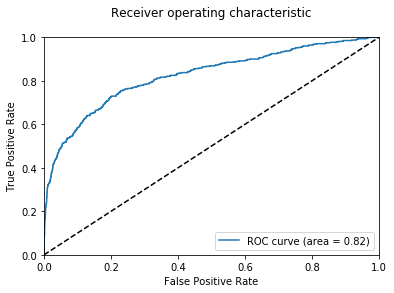

In [23]:
def plot_roc(test_y, probas_):
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    pl.clf()
    pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.0])
    pl.ylim([0.0, 1.0])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('Receiver operating characteristic\n')
    pl.legend(loc="lower right")
    pl.show()

plot_roc(y_test, probas_)

We were able to increase the AUROC by about 2% after tuning the parameters for the random forest model.

# Understanding and using the model

Let us start by taking a look at the most important features.

In [24]:
importances = rfclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("\nFeature ranking (Top 10):")
for f in range(10):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))



Feature ranking (Top 10):
1. feature 0 ApplicationType (0.221059)
2. feature 73 TotalYearsOfExp (0.194653)
3. feature 21 HighEduLevelCompleted (0.063578)
4. feature 25 JobPostingDate (0.054668)
5. feature 11 GymBadgePerm1 (0.025874)
6. feature 1 ApplyDate (0.020186)
7. feature 40 PokemonTrainerClass (0.019751)
8. feature 24 InternalEmployee (0.015465)
9. feature 15 GymBadgeTemp1 (0.015221)
10. feature 18 GymBadgeTemp4 (0.015076)


In [25]:
raw_data_backup['ApplicationType'].unique()

array(['Applicant', 'Reassign', 'Inquiry'], dtype=object)

Naturally, the type of applications can determine the rate of success, and it is not hard to imagine that hiring is seasonal. But as far as the factors to look into while seeking out potentially successful candidates, it is clear that the total years of experience and the highest education level completed are the key factors.

For additional insight and debugging, we can export all the decision trees as images (e.g. pdf) and store/view them. This will require installing the Graphviz package (`brew install graphviz` and `brew install freetype imagemagick`). It is recommended to run this within a `venv`.

In [26]:
from sklearn.tree import export_graphviz
from subprocess import call

idx = 1
for estimator in rfclf.estimators_:
    # Export as dot file
    export_graphviz(estimator, out_file='trees/dots/tree_{}.dot'.format(idx), 
                    feature_names = X_train.columns,
                    class_names = ['0','1'],
                    rounded = True, proportion = False, 
                    precision = 2, filled = True)

    # Convert to pdf using system command (requires Graphviz)
    call(['dot', '-Tpdf', 'trees/dots/tree_{}.dot'.format(idx), '-o', 'trees/pdfs/tree_{}.pdf'.format(idx)])
    idx += 1



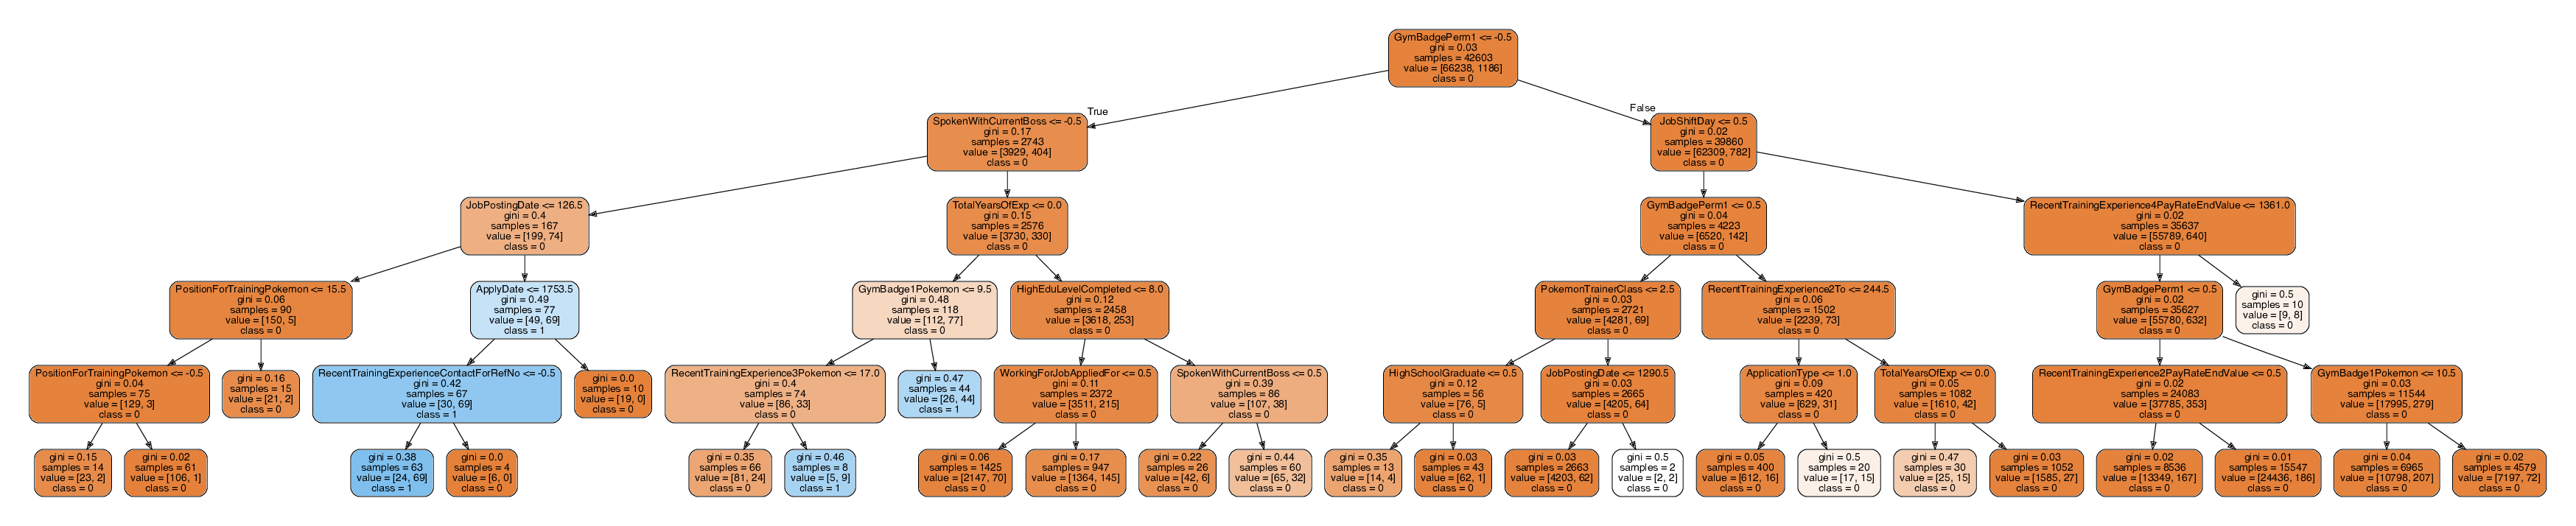

In [27]:
# Display an arbitrary tree in jupyter notebook
from wand.image import Image as WImage

img = WImage(filename='trees/pdfs/tree_2.pdf')
img

## Bias vs Variance

When we discuss prediction models, prediction errors can be decomposed into two main subcomponents we care about: error due to "bias" and error due to "variance". There is a tradeoff between a model's ability to minimize bias and variance. Understanding these two types of error can help us diagnose model results and avoid the mistake of over- or under-fitting. (Source: http://scott.fortmann-roe.com/docs/BiasVariance.html)

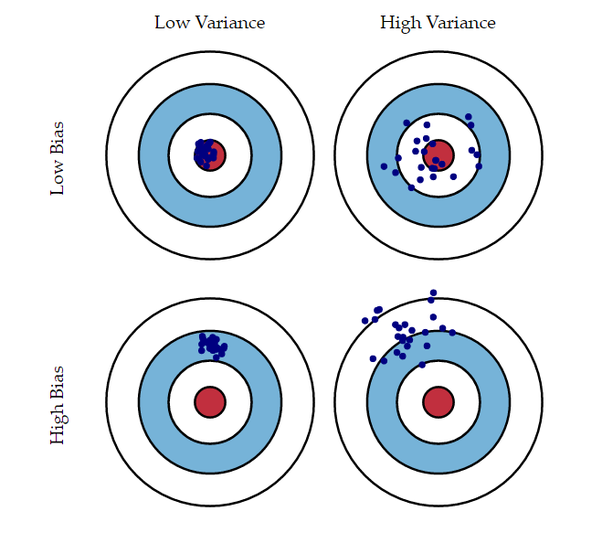

In [55]:
img = WImage(filename='bias_variance.png')
img

In the image below, the model on the left is probably underfitting, while the model on the right is likely overfitting.

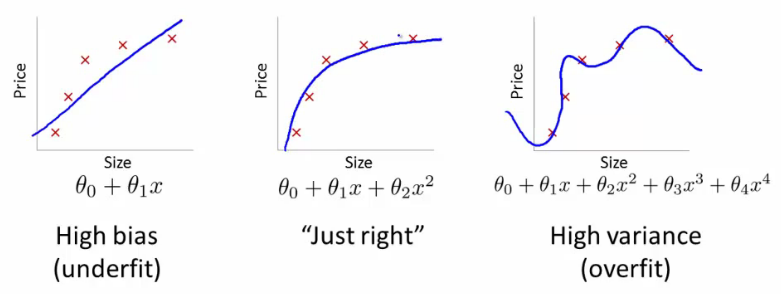

In [58]:
img = WImage(filename='over_under.png')
img

How to deal with **under-fitting**?
- Increase the model complexity

How to deal with **over-fitting**?
- More data can help
- Otherwise, reduce model compexity (e.g. feature selection)
- Regularization 

### Parameter tuning

Below we demonstrate some of the parameter tuning process of the random forest.

In [41]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

def plot_compare(series, series_name, train_results, test_results):
    line1, = plt.plot(series, train_results, 'b', label="Train AUC")
    line2, = plt.plot(series, test_results, 'r', label="Test AUC")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    plt.xlabel(series_name)
    plt.show()

First we deomonstrate the effect of number of trees. As each tree is trained with a radnom slice of the training data, and the result is averaged over all the trees, increasing number of tree helps reducing the variance of the model.

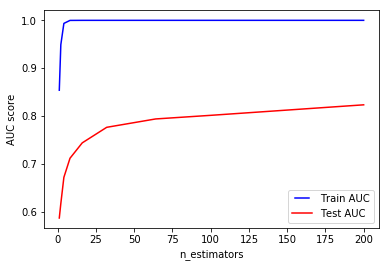

In [42]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict_proba(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred[:, 1])
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict_proba(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:, 1])
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plot_compare(n_estimators, 'n_estimators', train_results, test_results)


Next we demonstrate how letting the grow to unchecked depth can introduce high bias (overfit) to the model.

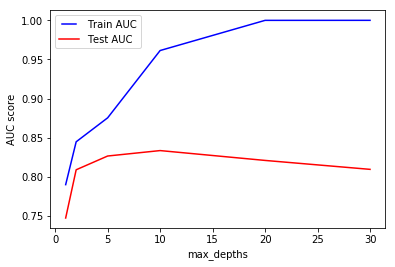

In [48]:
max_depths = [30, 20, 10, 5, 2, 1]
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators=200, max_depth= max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict_proba(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred[:, 1])
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict_proba(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:, 1])
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plot_compare(max_depths, 'max_depths', train_results, test_results)

Also used in the model: `max_features` and `min_samples_split`.